In [60]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import xarray as xr
import cartopy.crs as ccrs

In [61]:
#netcdf data
ds = xr.open_dataset('GEOS-CF_AirQuality_20180101_0030z.nc4')

In [62]:
O3 = ds.O3
O3

<xarray.DataArray 'O3' (time: 1, lev: 1, lat: 721, lon: 1440)>
[1038240 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8
  * lat      (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0
  * lev      (lev) float64 72.0
  * time     (time) datetime64[ns] 2018-01-01T00:30:00
Attributes:
    long_name:       Ozone (O3, MW = 48.00 g mol-1) volume mixing ratio dry air
    units:           mol mol-1
    fmissing_value:  1000000000000000.0
    standard_name:   Ozone (O3, MW = 48.00 g mol-1) volume mixing ratio dry air
    vmin:            -1000000000000000.0
    vmax:            1000000000000000.0
    valid_range:     [-1.e+15  1.e+15]

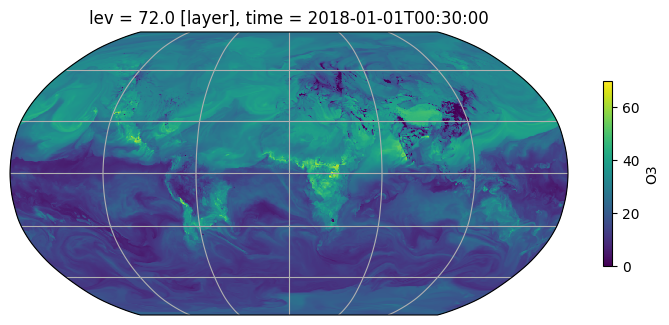

In [63]:
O3 = ds.O3 * 1e9 # convert to ppb

fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection=ccrs.Robinson())
O3.plot(ax=ax, transform=ccrs.PlateCarree(), 
        cbar_kwargs={'shrink': 0.4}) # This line just makes the axis smaller
# ax.coastlines() # can't download the coastlines???
ax.gridlines()

In [64]:
# Lowest values seem to be over the Southern Ocean
# Highest values are in Central Africa, East Asia, and Central America. Broadly, the Northern Hemisphere.

In [65]:
max=O3.where(O3==O3.max(), drop=True)
print(max)

<xarray.DataArray 'O3' (time: 1, lev: 1, lat: 1, lon: 1)>
array([[[[69.73278]]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -118.8
  * lat      (lat) float64 34.5
  * lev      (lev) float64 72.0
  * time     (time) datetime64[ns] 2018-01-01T00:30:00


In [66]:
min = O3.where(O3==0, drop=True)
print(min)
# Between the latitudes of 53E and 56E and the longitudes between 38-40E and around 73E

<xarray.DataArray 'O3' (time: 1, lev: 1, lat: 4, lon: 8)>
array([[[[nan, nan, nan, nan, nan,  0.,  0., nan],
         [nan, nan, nan, nan, nan, nan,  0.,  0.],
         [ 0., nan,  0.,  0.,  0., nan, nan, nan],
         [nan,  0.,  0.,  0.,  0., nan, nan, nan]]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 38.5 38.75 39.0 39.25 39.5 73.25 73.5 73.75
  * lat      (lat) float64 53.0 53.25 55.75 56.0
  * lev      (lev) float64 72.0
  * time     (time) datetime64[ns] 2018-01-01T00:30:00


In [70]:
# LA O3 
print(O3.sel(lat=34.0549, lon =-118.2426, method = 'nearest'))

<xarray.DataArray 'O3' (time: 1, lev: 1)>
array([[45.401974]], dtype=float32)
Coordinates:
    lon      float64 -118.2
    lat      float64 34.0
  * lev      (lev) float64 72.0
  * time     (time) datetime64[ns] 2018-01-01T00:30:00


In [71]:
# Honolulu, Hawaii O3
print(O3.sel(lat=21.3099, lon=-157.8581, method = 'nearest'))

<xarray.DataArray 'O3' (time: 1, lev: 1)>
array([[35.50667]], dtype=float32)
Coordinates:
    lon      float64 -157.8
    lat      float64 21.25
  * lev      (lev) float64 72.0
  * time     (time) datetime64[ns] 2018-01-01T00:30:00
